# Inputs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [5]:
# Import the data from a Json file

with open('./MyData/StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-10-18 17:17', 'artistName': 'Malvina Reynolds', 'trackName': 'Little Boxes', 'msPlayed': 17706}, {'endTime': '2020-10-18 17:22', 'artistName': 'Nikki Blonsky', 'trackName': 'Good Morning Baltimore', 'msPlayed': 234140}, {'endTime': '2020-10-18 17:25', 'artistName': 'James Marsden', 'trackName': 'The Nicest Kids In Town', 'msPlayed': 162549}, {'endTime': '2020-10-18 17:28', 'artistName': 'Michelle Pfeiffer', 'trackName': '(The Legend Of) Miss Baltimore Crabs', 'msPlayed': 11553}, {'endTime': '2020-10-18 17:28', 'artistName': 'Zac Efron', 'trackName': 'It Takes Two', 'msPlayed': 184533}]


In [6]:
# Convert from JSON to a data frame

history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [7]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  6350 non-null   object
 1   end_time     6350 non-null   object
 2   ms_played    6350 non-null   int64 
 3   track_name   6350 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.6+ KB


In [8]:
with open('./MyData/StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-10-18 17:17', 'artistName': 'Malvina Reynolds', 'trackName': 'Little Boxes', 'msPlayed': 17706}, {'endTime': '2020-10-18 17:22', 'artistName': 'Nikki Blonsky', 'trackName': 'Good Morning Baltimore', 'msPlayed': 234140}, {'endTime': '2020-10-18 17:25', 'artistName': 'James Marsden', 'trackName': 'The Nicest Kids In Town', 'msPlayed': 162549}, {'endTime': '2020-10-18 17:28', 'artistName': 'Michelle Pfeiffer', 'trackName': '(The Legend Of) Miss Baltimore Crabs', 'msPlayed': 11553}, {'endTime': '2020-10-18 17:28', 'artistName': 'Zac Efron', 'trackName': 'It Takes Two', 'msPlayed': 184533}]


In [9]:
history_2 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_2['artist_name'] = extract_json_value('artistName')
history_2['end_time'] = extract_json_value('endTime')
history_2['ms_played'] = extract_json_value('msPlayed')
history_2['track_name'] = extract_json_value('trackName')

In [10]:
history_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  6350 non-null   object
 1   end_time     6350 non-null   object
 2   ms_played    6350 non-null   int64 
 3   track_name   6350 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.6+ KB


In [13]:
history = history_1.append(history_2)

In [14]:
history

,artist_name,end_time,ms_played,track_name
0,Malvina Reynolds,2020-10-18 17:17,17706,Little Boxes
1,Nikki Blonsky,2020-10-18 17:22,234140,Good Morning Baltimore
2,James Marsden,2020-10-18 17:25,162549,The Nicest Kids In Town
3,Michelle Pfeiffer,2020-10-18 17:28,11553,(The Legend Of) Miss Baltimore Crabs
4,Zac Efron,2020-10-18 17:28,184533,It Takes Two
...,...,...,...,...
6345,Dontcry,2021-10-17 06:55,113594,Cosmos
6346,Jazzinuf,2021-10-17 06:59,262000,Sunflower Samurai
6347,mommy,2021-10-17 07:01,116061,hammock
6348,drkmnd,2021-10-17 07:04,164800,Interstellar


In [15]:
#converting end_time to timestamp format
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Malvina Reynolds,2020-10-18 17:17:00,17706,Little Boxes
1,Nikki Blonsky,2020-10-18 17:22:00,234140,Good Morning Baltimore
2,James Marsden,2020-10-18 17:25:00,162549,The Nicest Kids In Town
3,Michelle Pfeiffer,2020-10-18 17:28:00,11553,(The Legend Of) Miss Baltimore Crabs
4,Zac Efron,2020-10-18 17:28:00,184533,It Takes Two


In [16]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Malvina Reynolds,2020-10-18 17:17:00,Little Boxes,0.295100
1,Nikki Blonsky,2020-10-18 17:22:00,Good Morning Baltimore,3.902333
2,James Marsden,2020-10-18 17:25:00,The Nicest Kids In Town,2.709150
3,Michelle Pfeiffer,2020-10-18 17:28:00,(The Legend Of) Miss Baltimore Crabs,0.192550
4,Zac Efron,2020-10-18 17:28:00,It Takes Two,3.075550


# Popularity of artist based on the number of times their songs were clicked and played

In [17]:

most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
Olivia Rodrigo                        1580
Zandi Holup                           1028
The Daily                              630
Taylor Swift                           208
Leon Bridges                           196
Brandi Carlile                         172
Adele                                  166
Lana Del Rey                           138
Edward Sharpe & The Magnetic Zeros     138
Juniore                                124
Conan Gray                             118
George Ezra                            116
Tourist                                112
Tyler Childers                         104
Françoise Hardy                         98
Name: track_name, dtype: int64


In [18]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show()

# Popularity of artist based on the total amount of time spent listening to their songs

In [19]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = history.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
The Daily                             10573.362933
Olivia Rodrigo                         4181.505767
Zandi Holup                            2636.307333
ESPN Daily                             1322.015033
Gastropod                               986.620500
Modern Love                             867.421600
Taylor Swift                            679.660400
Adele                                   614.306900
Leon Bridges                            535.013900
Sway                                    534.359800
Philosophize This!                      492.179300
How I Built This with Guy Raz           459.551633
Edward Sharpe & The Magnetic Zeros      437.087700
Juniore                                 422.801367
Tourist                                 413.938767
Name: minutes_played, dtype: float64

In [20]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show()


# Total amount of time spent listening to music each day

In [21]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Malvina Reynolds,Little Boxes,0.295100,2020-10-18,17:17:00
1,Nikki Blonsky,Good Morning Baltimore,3.902333,2020-10-18,17:22:00
2,James Marsden,The Nicest Kids In Town,2.709150,2020-10-18,17:25:00
3,Michelle Pfeiffer,(The Legend Of) Miss Baltimore Crabs,0.192550,2020-10-18,17:28:00
4,Zac Efron,It Takes Two,3.075550,2020-10-18,17:28:00


In [22]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2020-10-18,266.327933
1,2020-10-20,31.186867
2,2020-10-21,141.709800
3,2020-10-22,84.750233
4,2020-10-23,399.787533


In [23]:
fig = px.line(day, x="day", y="minutes_played",
              labels={
                     "day": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show()

# Time spent listening on each day of the week

In [24]:
date = history_1.append(history_2)
date['minutes_played'] = date.ms_played.divide(60000)
date.drop('ms_played', axis=1, inplace=True)

date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()

,artist_name,end_time,track_name,minutes_played,day
0,Malvina Reynolds,2020-10-18 17:17,Little Boxes,0.295100,Sunday
1,Nikki Blonsky,2020-10-18 17:22,Good Morning Baltimore,3.902333,Sunday
2,James Marsden,2020-10-18 17:25,The Nicest Kids In Town,2.709150,Sunday
3,Michelle Pfeiffer,2020-10-18 17:28,(The Legend Of) Miss Baltimore Crabs,0.192550,Sunday
4,Zac Efron,2020-10-18 17:28,It Takes Two,3.075550,Sunday


In [25]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head()

,day,minutes_played
0,Friday,8992.586667
1,Monday,6199.179033
2,Saturday,6778.023300
3,Sunday,7049.949233
4,Thursday,7814.759500


In [26]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

# Artist and their songs

In [27]:
artist = history_1.append(history_2)
artist['minutes_played'] = artist.ms_played.divide(60000)
artist.drop('ms_played', axis=1, inplace=True)
artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played
0,Malvina Reynolds,Little Boxes,0.295100
1,Nikki Blonsky,Good Morning Baltimore,3.902333
2,James Marsden,The Nicest Kids In Town,2.709150
3,Michelle Pfeiffer,(The Legend Of) Miss Baltimore Crabs,0.192550
4,Zac Efron,It Takes Two,3.075550


In [28]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Malvina Reynolds,Little Boxes
1,Nikki Blonsky,Good Morning Baltimore
2,James Marsden,The Nicest Kids In Town
3,Michelle Pfeiffer,(The Legend Of) Miss Baltimore Crabs
4,Zac Efron,It Takes Two
...,...,...
6300,Saib,in your arms
6302,Rook1e,do you dream of me too?
6305,Slumberville,Ladybug
6306,Joey Pecoraro,Hello Sun


In [29]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,1010 Benja SL,1
1,21 Savage,2
2,30 Years and Some Change,1
3,311,1
4,5 Seconds of Summer,1
...,...,...
1043,童安格,1
1044,羅大佑,1
1045,葛蘭,1
1046,陳蘭麗,1


In [30]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,1010 Benja SL,1
1,21 Savage,2
2,30 Years and Some Change,1
3,311,1
4,5 Seconds of Summer,1


In [31]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,1010 Benja SL,11.933333
1,21 Savage,0.460767
2,30 Years and Some Change,2.815467
3,311,7.036000
4,5 Seconds of Summer,6.580367


In [32]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist

,artist_name,unique_songs,minutes_played
851,The Daily,181,10573.362933
130,Brandi Carlile,65,398.128667
828,Taylor Swift,62,679.660400
942,Tyler Childers,36,341.513800
249,ESPN Daily,33,1322.015033
654,Olivia Rodrigo,32,4181.505767
408,Jay Chou,28,232.593067
509,Lana Del Rey,26,412.755900
434,Johnny Cash,24,121.295700
877,The Lumineers,21,271.763800


In [33]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most listened to song

In [34]:
song = history_1.append(history_2)
song['minutes_played'] = song.ms_played.divide(60000)
song.drop('ms_played', axis=1, inplace=True)
song

,artist_name,end_time,track_name,minutes_played
0,Malvina Reynolds,2020-10-18 17:17,Little Boxes,0.295100
1,Nikki Blonsky,2020-10-18 17:22,Good Morning Baltimore,3.902333
2,James Marsden,2020-10-18 17:25,The Nicest Kids In Town,2.709150
3,Michelle Pfeiffer,2020-10-18 17:28,(The Legend Of) Miss Baltimore Crabs,0.192550
4,Zac Efron,2020-10-18 17:28,It Takes Two,3.075550
...,...,...,...,...
6345,Dontcry,2021-10-17 06:55,Cosmos,1.893233
6346,Jazzinuf,2021-10-17 06:59,Sunflower Samurai,4.366667
6347,mommy,2021-10-17 07:01,hammock,1.934350
6348,drkmnd,2021-10-17 07:04,Interstellar,2.746667


In [35]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
2115,Wait For You,2636.307333
2348,drivers license,1213.369233
2345,deja vu,1206.356200
568,Easy On Me,453.900367
101,A la plage,384.217167
...,...,...
182,Apple’s Bet on China,0.000000
2030,"To Fight Climate Change, Bank on Soil",0.000000
1615,Selects: What Was the Deal With the Hatfields ...,0.000000
2014,Throw It All Away,0.000000


In [36]:
song_artist = history_1.append(history_2)
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop('end_time', axis=1, inplace=True)
song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
1739,Jay Chou,龍捲風
1739,Jay Chou,龍捲風
1726,Jay Chou,黑色毛衣
1726,Jay Chou,黑色毛衣
1728,Jay Chou,雙截棍
1728,Jay Chou,雙截棍
1733,Jay Chou,陽光宅男
1733,Jay Chou,陽光宅男
1773,周璇,陋巷之春
1773,周璇,陋巷之春


In [37]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name
1739,Jay Chou,龍捲風
1726,Jay Chou,黑色毛衣
1728,Jay Chou,雙截棍
1733,Jay Chou,陽光宅男
1773,周璇,陋巷之春
...,...,...
1284,The Knowledge Project,"#22 Adam Grant: Givers, Takers, and the Resili..."
16,The Knowledge Project,#18 Naval Ravikant: The Angel Philosopher
2058,Discordinated,#006 - Saguaro Cactus
2631,Eat Drink Asia,Xiaolongbao: how soup dumplings went global


In [38]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
373,Zandi Holup,Wait For You,2636.307333
140,Olivia Rodrigo,drivers license,1213.369233
143,Olivia Rodrigo,deja vu,1206.356200
1920,Adele,Easy On Me,453.900367
2387,Juniore,A la plage,384.217167
...,...,...,...
474,Brandi Carlile,Throw It All Away,0.000000
1592,Shih Tzu,Hoy,0.000000
560,Revisionist History,The Queen of Cuba,0.000000
72,The Daily,‘Something Terrible Has Happened’,0.000000


In [39]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artist_name,track_name,minutes_played
0,Zandi Holup,Wait For You,2636.307333
1,Olivia Rodrigo,drivers license,1213.369233
2,Olivia Rodrigo,deja vu,1206.356200
3,Adele,Easy On Me,453.900367
4,Juniore,A la plage,384.217167
5,Philosophize This!,Episode #001 ... Presocratic Philosophy - Ionian,361.356900
6,Olivia Rodrigo,happier,322.859733
7,George Ezra,Budapest,239.936633
8,Edward Sharpe & The Magnetic Zeros,40 Day Dream - 2019 - Remaster,236.036267
9,Modern Love,Waiting For The Wall To Crumble | With Kelly M...,231.966300


In [40]:
songs = song.drop(song.index[0])
songs

,artist_name,track_name,minutes_played
1,Olivia Rodrigo,drivers license,1213.369233
2,Olivia Rodrigo,deja vu,1206.356200
3,Adele,Easy On Me,453.900367
4,Juniore,A la plage,384.217167
5,Philosophize This!,Episode #001 ... Presocratic Philosophy - Ionian,361.356900
6,Olivia Rodrigo,happier,322.859733
7,George Ezra,Budapest,239.936633
8,Edward Sharpe & The Magnetic Zeros,40 Day Dream - 2019 - Remaster,236.036267
9,Modern Love,Waiting For The Wall To Crumble | With Kelly M...,231.966300
10,Tourist,We Stayed Up All Night - Instrumental,226.520767


In [41]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Top 50 Songs

In [42]:
top_50 = history_1.append(history_2)
top_50['minutes_played'] = top_50.ms_played.divide(60000)
top_50.drop('ms_played', axis=1, inplace=True)
top_50

,artist_name,end_time,track_name,minutes_played
0,Malvina Reynolds,2020-10-18 17:17,Little Boxes,0.295100
1,Nikki Blonsky,2020-10-18 17:22,Good Morning Baltimore,3.902333
2,James Marsden,2020-10-18 17:25,The Nicest Kids In Town,2.709150
3,Michelle Pfeiffer,2020-10-18 17:28,(The Legend Of) Miss Baltimore Crabs,0.192550
4,Zac Efron,2020-10-18 17:28,It Takes Two,3.075550
...,...,...,...,...
6345,Dontcry,2021-10-17 06:55,Cosmos,1.893233
6346,Jazzinuf,2021-10-17 06:59,Sunflower Samurai,4.366667
6347,mommy,2021-10-17 07:01,hammock,1.934350
6348,drkmnd,2021-10-17 07:04,Interstellar,2.746667


In [46]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 

In [44]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,drivers license,1213.369233
2,deja vu,1206.356200
3,Easy On Me,453.900367
4,A la plage,384.217167
5,Episode #001 ... Presocratic Philosophy - Ionian,361.356900
6,happier,322.859733
7,Budapest,239.936633
8,40 Day Dream - 2019 - Remaster,236.036267
9,Waiting For The Wall To Crumble | With Kelly M...,231.966300
10,We Stayed Up All Night - Instrumental,226.520767


In [ ]:
import pandas as pd
df1 = pd.DataFrame(top_50, columns=['q_data'])

# Visualisation

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB). 

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [45]:
my_songs = pd.read_csv("song.csv", encoding= 'unicode_escape')
my_songs.drop('Unnamed: 15', axis=1, inplace=True)
my_songs.drop('Unnamed: 14', axis=1, inplace=True)
my_songs.drop('Unnamed: 16', axis=1, inplace=True)
my_songs.head()

FileNotFoundError: [Errno 2] No such file or directory: 'song.csv'

# Spider Graph Comparisson of top 5

In [564]:
top_5 = my_songs.head(6)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('instrumentalness', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5.drop('time_signature', axis=1, inplace=True)
top_5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,danceability,energy,loudness,speechiness,acousticness
0,Gayatri Mantra 108 Times,0.635,0.704,-2.394,0.043,0.720
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [565]:
top_5.drop(top_5.index[0])

,track_name,danceability,energy,loudness,speechiness,acousticness
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [591]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.764,0.320,-7.209,0.055,0.837],
      theta=categories,
      fill='toself',
      name='Memories'
))

fig.add_trace(go.Scatterpolar(
      r=[0.695,0.762,-3.497,0.040,0.192],
      theta=categories,
      fill='toself',
      name='Circles'
))


fig.add_trace(go.Scatterpolar(
      r=[0.488,0.343,-8.985,0.044,0.556],
      theta=categories,
      fill='toself',
      name='Lose You To Love Me'
))

fig.update_layout(
    title = "Diversity in audio features of top 3 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [638]:
my_songs.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.622140], 
                             "energy":[0.593160],
                             "key":[5.940000],
                             "loudness":[-6.460500],
                             "mode":[0.800000],
                             "speechiness":[0.067240],
                             "acousticness":[0.359720],
                             "instrumentalness":[0.002873],
                             "liveness":[0.155520],
                             "valence":[0.454660],
                             "tempo":[116.117440],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.002873,0.15552,0.45466,116.11744,252700.72,3.92


# Happy or Sad?

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. The closer it is to 1, the more positive/happy

In [611]:
v = [0.448,0.575,0.553,0.098,0.201,0.673,0.246,0.419,0.604,0.417,0.864,0.168,0.471,0.223,0.678,0.424,0.446,0.355,0.244,0.376,0.534,0.38,0.394,0.569,0.569,0.422,0.746,0.538,0.661,0.443,0.441,0.913,0.345,0.545,0.292,0.75,0.286,0.671,0.374,0.289,0.678,0.37,0.334,0.619,0.131,0.276,0.341,0.417,0.515,0.407]
  
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in v: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  31
More than 0.6:  11
Between 0.5 and 0.6:  8


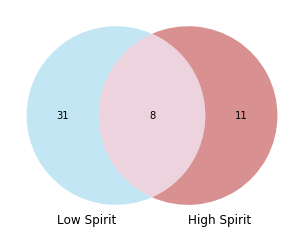

In [780]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2_unweighted(subsets = (31, 11, 8), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

# Fast or Slow?

In [641]:
fig = px.box(my_songs, y="tempo")
fig.show()

# World Wide

In [648]:
ww = pd.read_csv('top50.csv', encoding= 'unicode_escape')
ww.drop('Unnamed: 0', axis=1, inplace=True)
ww.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [662]:
ww.mean(axis=0)
avg_ww = pd.DataFrame({"danceability":[71.38/100], 
                             "energy":[64.06/100],
                             "key":[5.940000],
                             "loudness":[-5.66],
                             "mode":[0.800000],
                             "speechiness":[12.48/100],
                             "acousticness":[22.16/100],
                             "instrumentalness":[0.002873],
                             "liveness":[14.66/100],
                             "valence":[54.60/100],
                             "tempo":[120.06],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})

avg_ww.drop('duration_ms', axis=1, inplace=True)
avg_ww.drop('time_signature', axis=1, inplace=True)
avg_ww.drop('instrumentalness', axis=1, inplace=True)
avg_ww['Who'] = 'Everyone'

avg_ww


,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.7138,0.6406,5.94,-5.66,0.8,0.1248,0.2216,0.1466,0.546,120.06,Everyone


In [665]:
avg_my_songs['Who'] = 'Me'
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [673]:
average = avg_ww.append(avg_my_songs)
average

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.71380,0.64060,5.94,-5.6600,0.8,0.12480,0.22160,0.14660,0.54600,120.06000,Everyone
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [706]:
average.to_excel('song12.xlsx', index=True)

In [733]:
average_comp = pd.read_csv('song12.csv', encoding= 'unicode_escape')
average_comp.rename(columns = {"Unnamed: 0":"Feature"}, inplace = True)
average_comp

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
2,key,5.9400,5.94000
3,loudness,-5.6600,-6.46050
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466
9,tempo,120.0600,116.11744


In [755]:
average_compare = average_comp.drop(average_comp.index[9])
average_compare = average_compare.drop(average_compare.index[2])
compare_features = average_compare.drop(average_compare.index[2])
compare_features

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466


In [778]:

trace1=go.Bar(x=compare_features['Feature'],y=compare_features['Everyone'],marker=dict(color='firebrick',opacity=1),name="Everyone")
trace2=go.Bar(x=compare_features['Feature'],y=compare_features['Me'],marker=dict(color='darksalmon',opacity=1),name="Me")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS The World's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()


In [819]:
loudness = pd.DataFrame({"Who":['Everyone', 'Me'],"Loudness":[-5.6600,-6.4605]})
loudness

,Who,Loudness
0,Everyone,-5.6600
1,Me,-6.4605


In [823]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()

In [826]:
tempo = pd.DataFrame({"Who":['Everyone', 'Me'],"Tempo":[120.06000,116.11744]})
tempo


,Who,Tempo
0,Everyone,120.06000
1,Me,116.11744


In [828]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()